In [61]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [4]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [5]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

output
1    34
0    27
Name: count, dtype: int64


<Axes: xlabel='output'>

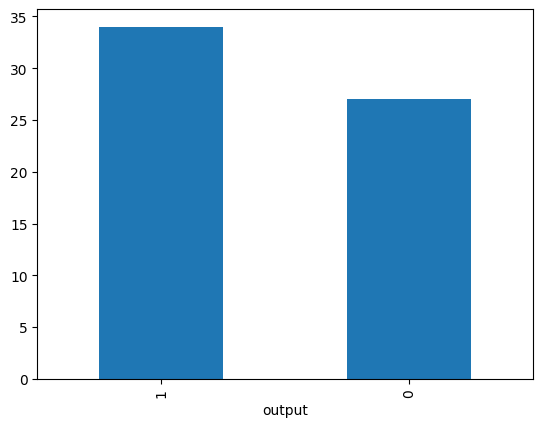

In [14]:
print(y_test.value_counts())
y_test.value_counts().plot.bar()

In [57]:
from sklearn.linear_model import PoissonRegressor
clc = PoissonRegressor(max_iter = 100, fit_intercept = True)
clc.fit(x_train, y_train)

PoissonRegressor()

In [32]:
y_pred = clc.predict(x_test)

In [38]:
clc.score(x_train, y_train)

0.3015662936186342

In [39]:
clc.coef_

array([-0.02978054, -0.0835352 ,  0.10221736, -0.02781259, -0.01228734,
       -0.01103687,  0.01562539,  0.08367084, -0.09545204, -0.08972144,
        0.05061743, -0.11082081, -0.06950886])

In [40]:
clc.intercept_

-0.686821628684768

In [42]:
clc.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

array([20.65728382])

In [47]:
import statsmodels.api as sm

In [58]:
# Fit Poisson regression model
pois_reg = sm.GLM(y_train, x_train, family = sm.families.Poisson()).fit()

In [60]:
# Display model summary
print(pois_reg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                  242
Model:                            GLM   Df Residuals:                      229
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -226.03
Date:                Mon, 15 Jul 2024   Deviance:                       190.06
Time:                        17:42:39   Pearson chi2:                     101.
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1285
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0053      0.075      0.071      0.9